My some early experiments with TF2 (tf.function, tensors, linear regression implementation etc )(from TF tutorials)

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import SGD


KeyboardInterrupt: 

In [31]:
tf.executing_eagerly()

True

In [3]:
x = [[2.]]
m = tf.matmul(x, x)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [4]:
a = [[2. , 3. ] , [4. , 5.]]
# Broadcasting support
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[3. 4.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [6]:
# Use NumPy values


c = np.multiply(a, b)
print(c)



[[ 6. 12.]
 [20. 30.]]


In [7]:
def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)
  for num in range(1, max_num.numpy()+1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int(num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

In [8]:
fizzbuzz(1000)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz
101
Fizz
103
104
FizzBuzz
106
107
Fizz
109
Buzz
Fizz
112
113
Fizz
Buzz
116
Fizz
118
119
FizzBuzz
121
122
Fizz
124
Buzz
Fizz
127
128
Fizz
Buzz
131
Fizz
133
134
FizzBuzz
136
137
Fizz
139
Buzz
Fizz
142
143
Fizz
Buzz
146
Fizz
148
149
FizzBuzz
151
152
Fizz
154
Buzz
Fizz
157
158
Fizz
Buzz
161
Fizz
163
164
FizzBuzz
166
167
Fizz
169
Buzz
Fizz
172
173
Fizz
Buzz
176
Fizz
178
179
FizzBuzz
181
182
Fizz
184
Buzz
Fizz
187
188
Fizz
Buzz
191
Fizz
193
194
FizzBuzz
196
197
Fizz
199
Buzz
Fizz
202
203
Fizz
Buzz
206
Fizz
208
209
FizzBuzz
211
212
Fizz
214
Buzz
Fizz
217
218
Fizz
Buzz
221
Fizz
223
224
Fi

In [4]:
# Variables
tf.debugging.set_log_device_placement(True)


In [4]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [5]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
As NumPy:  [[1. 2.]
 [3. 4.]]


Num GPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
with tf.device('/GPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0, 3.0]])

with tf.device('GPU:0'):
  # Element-wise multiply
  k = a * b

print(k)


tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)


In [8]:
# Из Шакла Машинное обучение и Tensorflow
raw_data = [ 1., 2., 8., -1., 0., 5.5, 6., 13.]
spike = tf.Variable([False] * len(raw_data), name="spikes")
for i in range(1, len(raw_data)):
    if raw_data[i] - raw_data[i - 1] > 5:
        updater = spike[i - 1].assign(True)
print("Spike", spike)
spike.save

Spike <tf.Variable 'Variable:0' shape=() dtype=bool, numpy=False>
Spike <tf.Variable 'Variable:0' shape=() dtype=bool, numpy=True>
Spike <tf.Variable 'Variable:0' shape=() dtype=bool, numpy=False>
Spike <tf.Variable 'Variable:0' shape=() dtype=bool, numpy=False>
Spike <tf.Variable 'Variable:0' shape=() dtype=bool, numpy=True>
Spike <tf.Variable 'Variable:0' shape=() dtype=bool, numpy=False>
Spike <tf.Variable 'Variable:0' shape=() dtype=bool, numpy=True>


In [33]:
# Testing new features from TF 2
raw_data = np.random.normal(10, 1, 100)
update_avg = tf.Variable(0., dtype=tf.float64)
curr_value = tf.Variable(0., dtype=tf.float64)
prev_avg = tf.Variable(0., dtype=tf.float64)
@tf.function
def sliding_mean(curr_v, prev_v, alpha = tf.constant(0.05, dtype=tf.float64)):
    prev_avg.assign(alpha * curr_v + (1 - alpha) * prev_v)

writer = tf.summary.create_file_writer("logs")

In [34]:
%load_ext tensorboard
tf.compat.v1.variables_initializer(tf.compat.v1.global_variables())
with writer.as_default():
    for i in range(len(raw_data)):
        tf.summary.scalar("running_average", prev_avg, step=i)
        sliding_mean(raw_data[i], prev_avg)
        print(raw_data[i], prev_avg)
        tf.summary.scalar("incoming_values", raw_data[i], step=i)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
9.343100572455386 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.4671550286227693>
9.41796289638261 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.9146954220107613>
8.592528532727345 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2985870775465904>
9.31623449807844 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.6994694485731827>
8.586603068993968 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.0438261295942217>
9.81446199200797 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.432357922714909>
9.962976863012708 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.808888869729799>
10.285377456448748 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.182713299065746>
9.078189118522099 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.4774870900385633>
10.257789806363222 <tf.Variable 'Variable:0' shape=() dtype=float64, 

8.016357671938582 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.66746157521115>
9.273364740428528 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.647756733472018>
9.98668727317749 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.664703260457292>
9.88594712716893 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.675765453792874>
9.722448758747312 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.678099619040596>
9.692014838272625 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.678795380002198>
10.476298083204208 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.718670515162296>
9.252798739316537 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.695376926370008>
10.507918663821144 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.736004013242564>
11.409239211502506 <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=9.81966577315556>
8.843151276464365 <tf.Variable 'Variable:0' shape=() dtype=float64, num

In [35]:
%tensorboard --logdir logs


Reusing TensorBoard on port 6006 (pid 10348), started 0:08:00 ago. (Use '!kill 10348' to kill it.)

Liner regression

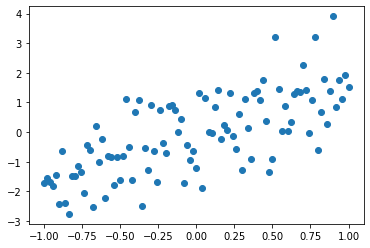

In [2]:
import matplotlib.pyplot as plt
x_train = np.linspace(-1, 1, 101, dtype=np.float32)
y_train = np.array(2 * x_train + np.random.randn(*x_train.shape), dtype=np.float32)
plt.scatter(x_train, y_train)
plt.show()

In [3]:

learning_rate = 0.01
epochs = 100
X_train = tf.Variable(x_train, dtype=tf.float32)
Y_train = tf.Variable(y_train, dtype=tf.float32)
W = tf.Variable(0.0, name="weights")
@tf.function
def minimize_func(x, y ,w):
    return tf.square(y - tf.multiply(x, w))

train_op = SGD(lr=learning_rate)
loss = lambda : minimize_func(X_train, Y_train, W)
var_list = [W]
for i in range(epochs):
        train_op.minimize(loss, var_list)

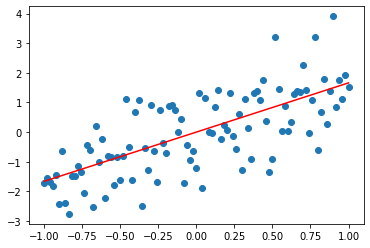

In [4]:
plt.scatter(x_train, y_train)
y_learned = X_train * W
plt.plot(x_train, y_learned, color="red")
plt.show()

In [5]:
sse = np.mean((np.mean(y_learned) - y_train) ** 2)
var = np.var(y_learned)
bias = sse - var - 0.01
print(bias)
print(var)

0.9309956336021423
0.9392726


LR with polynomial function

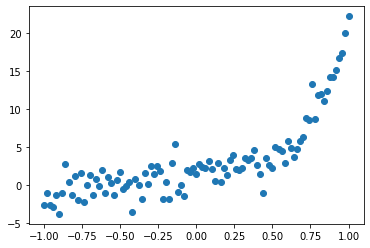

In [4]:
# creating data
trX = np.linspace(-1, 1, 101)
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
ideal_trY = trY.copy()
trY += np.random.randn(*trX.shape) * 1.5
plt.scatter(trX, trY)
plt.show()

In [37]:
from tensorflow.keras.losses import MSE
# @tf.function
def squared_error(y_true, y_pred):
   return tf.square(tf.subtract(y_pred, y_true))

def predic_func(x, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(x, i))
        terms.append(term)
    return tf.add_n(terms)

learning_rate = 0.005
X_train = tf.Variable(trX, dtype=tf.float32)
Y_train = tf.Variable(trY, dtype=tf.float32)
W = tf.Variable(tf.zeros((num_coeffs, 1)), name="params", dtype=tf.float32)
# C = tf.Variable(0, name="constant", dtype=tf.float32)
train_op = SGD(learning_rate=learning_rate)
loss = lambda : tf.reduce_sum(tf.square(Y_train - predic_func(X_train, W)))
epochs = 40
# var_list = [W]
for i in range(epochs):
    loss_1 = train_op.minimize(loss, [W])
    tf.print("LOSS: ", loss_1)
    # print("GRAD: ", grad)
# ERROR approximation is wrong
print(W)

LOSS:  1
LOSS:  2
LOSS:  3
LOSS:  4
LOSS:  5
LOSS:  6
LOSS:  7
LOSS:  8
LOSS:  9
LOSS:  10
LOSS:  11
LOSS:  12
LOSS:  13
LOSS:  14
LOSS:  15
LOSS:  16
LOSS:  17
LOSS:  18
LOSS:  19
LOSS:  20
LOSS:  21
LOSS:  22
LOSS:  23
LOSS:  24
LOSS:  25
LOSS:  26
LOSS:  27
LOSS:  28
LOSS:  29
LOSS:  30
LOSS:  31
LOSS:  32
LOSS:  33
LOSS:  34
LOSS:  35
LOSS:  36
LOSS:  37
LOSS:  38
LOSS:  39
LOSS:  40
<tf.Variable 'params:0' shape=(6, 1) dtype=float32, numpy=
array([[1.129032 ],
       [2.4051406],
       [3.5226533],
       [4.1534863],
       [4.198732 ],
       [4.536217 ]], dtype=float32)>


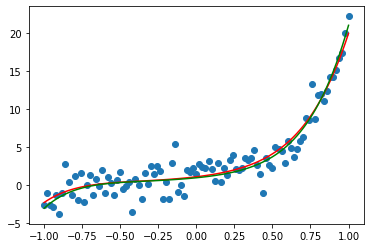

In [38]:
plt.scatter(X_train, Y_train)
y_learned = predic_func(X_train, W)
plt.plot(trX, y_learned.numpy(), color="red")
plt.plot(trX, ideal_trY, color="green")
plt.show()

array([[6.60301]], dtype=float32)

Linear regression with L1 regularization

In [30]:
from sklearn.model_selection import train_test_split
x_dataset = np.linspace(-1, 1, 100)
num_coeffs = 9
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3
(X_train, X_test, Y_train, Y_test) = train_test_split(x_dataset, y_dataset, train_size=0.7)

In [ ]:
np.random.seed(100)
learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.
@tf.function
def minimize_func(x, y, w):
    pred = 0
    for i in range(num_coeffs):
        # тут что то сломано и я не понимаю что
        pred += w[i] * tf.math.pow(x, i)
    error = tf.square(y - pred) + reg_lambda * tf.math.reduce_sum(tf.square(w))
    return error